### Let's take a closer look at color spaces

#### First thing to remember about OpenCV's RGB is that it's BGR (I know, this is annoying)
this is because of alphabetical order

In [3]:
image = cv2.imread('my.jpeg')
image.shape

(5184, 3456, 3)

##### it's a DSLR image so its dimension's are very high so it will not open fully in window screen

###### Let's take a look at the image again

In [1]:
import cv2
import numpy as np

image = cv2.imread('my.jpeg', 200) #this 200 is for to change the size
cv2.imshow('show', image)
cv2.waitKey()
cv2.destroyAllWindows()

In [2]:
image.shape

(648, 432, 3)

##### Let's look at the individual color levels for the first pixe(0, 0)

In [11]:
#BGR values for the first 0, 0 pixel
B, G, R = image[0, 0]
print(B, G, R)

140 150 150


#### Let's see what happens when we convert it to grayscale

In [12]:
image.shape

(648, 432, 3)

## cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
Its used to change the 3-D(colored) image in 2-D(gray) image

###### ^As you can see it's two dimension image the values 3 represents the BGR color's of image

In [15]:
gray_img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2.imshow('gray image', gray_img)
cv2.waitKey(2220)
cv2.destroyAllWindows()
print(gray_img.shape)

(648, 432)


###### ^as you can see it's a two dimension image so actually grayscale method is convert the three dimension image to two dimension by deleting 3rd dimension of image for color to 2 dimension

# HSV 
another color format

### cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

###### it's very useful color format used in color filtering

In [16]:
img = cv2.imread('my.jpeg', 200)
hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
cv2.imshow('HSV image', hsv_img)
cv2.imshow('Hue channel', hsv_img[:, :, 0])
cv2.imshow('Saturation channel', hsv_img[:, :, 1])
cv2.imshow('values channel', hsv_img[:, :, 2])
cv2.waitKey()
cv2.destroyAllWindows()

#### Let's now explore looking at individual channels in an RGB image

In [18]:
img.shape

(648, 432, 3)

# Merge, Split

In [27]:
#OpenCV's 'split' function splites the image into each color index
B, G, R = cv2.split(image)
print(f'B\'s shape is {B.shape}')
print(f'G\'s shape is {G.shape}')
print(f'R\'s shape is {R.shape}')
cv2.imshow('Red', R) #all R, G, B images going to show as gray image because it's have only one dimension
cv2.imshow('Green', G)
cv2.imshow('Blue', B)
cv2.waitKey()
cv2.destroyAllWindows()

#Let's re-make the original image,
merged = cv2.merge([B, G, R]) # we need to pass all three color channels otherwise it will give us erro
cv2.imshow('Merged', merged)

#Let's amplify the blue color
merged = cv2.merge([B+100, G, R])
cv2.imshow('Merged withe Blue Amplified', merged)
cv2.waitKey(0)
cv2.destroyAllWindows()

B's shape is (648, 432)
G's shape is (648, 432)
R's shape is (648, 432)


# Merge 2 images

In [13]:
import cv2
import numpy as np
img1 = cv2.imread('my.jpeg')
img1 = cv2.resize(img1, (512, 700), interpolation = cv2.INTER_AREA) 
img2 = cv2.imread('my2.JPG')
img2 = cv2.resize(img2, (512, 700), interpolation = cv2.INTER_AREA) 

cv2.imwrite('my.JPG', img1)
cv2.imwrite('my2.JPG', img2)
#cv2.imshow('1', img1)
#cv2.imshow('2', img2)
B1, G1, R1 = cv2.split(img1)
B2, G2, R2 = cv2.split(img2)
merged = cv2.merge([B1, G1 + G2, R1 + R2])
merged2 = np.concatenate((img1, img2), axis = 1)
subtract = img1 - img2
add = img1 + img2
multiply = img1 * img2
devided = img1 / img2
img1by2 = img1 / 2
cv2.imshow('img1by2', img1by2)
cv2.imshow('Merged', merged)
cv2.imshow('Merged By concatenate', merged2)
cv2.imshow('Subtracted image', subtract)
cv2.imshow('Added image', add)
cv2.imshow('Multiplied images', multiply)
cv2.imshow('Devide images', devided)
cv2.waitKey()
cv2.destroyAllWindows()

##### ^by this we see all R, G, B in gray scale because these all are 2-D images

### But if we want to see R, G, B in colored

In [28]:
img.shape

(648, 432, 3)

In [29]:
img.shape[:2]

(648, 432)

In [32]:
B, G, R = cv2.split(img)

#let's create a matrix of zeros
#with dimensions of the image h x w
zeros = np.zeros(img.shape[:2], dtype = 'uint8')
cv2.imshow('Red', cv2.merge([zeros, zeros, R]))
cv2.imshow('Green', cv2.merge([zeros, zeros, G]))
cv2.imshow('Blue', cv2.merge([zeros, zeros, B]))
cv2.waitKey()
cv2.destroyAllWindows()

# Histogram

### Histogram are a great way to visualize individual color components

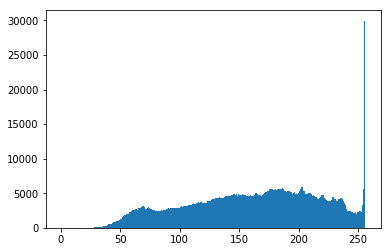

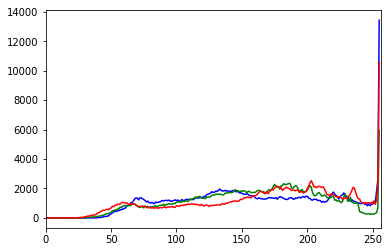

In [34]:
import cv2
import numpy as np
#We need to import matplotlib to create our histogram plots
import matplotlib.pyplot as plt
image = cv2.imread('my.jpeg', 200)
histogram = cv2.calcHist([image], [0], None, [256], [0, 256])

#We plot a histogram, ravel() flatnes our image array
plt.hist(image.ravel(), 256, [0, 256])
plt.show()
#viewing spearate color channels
color = ('b', 'g', 'r')

#We now separate the colors and plot each in the Histogram
for i, col in enumerate(color):
    histogram2 = cv2.calcHist([image], [i], None, [256], [0, 256])
    plt.plot(histogram2, color = col)
    plt.xlim([0, 256])
plt.show()